In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/thendralvanans/Thinkful-Project/main/Capstone%202/loan_data.csv" 
df = pd.read_csv(url)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(381, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


# Handling the missing values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df=df.drop(["Loan_ID"],axis=1)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median()).astype(int)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int)
df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)
df['Dependents'] = df['Dependents'].astype(int)

In [7]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))


Unique values in column Gender are: ['Male' 'Female']
Unique values in column Married are: ['Yes' 'No']
Unique values in column Dependents are: [1 0 2 3]
Unique values in column Education are: ['Graduate' 'Not Graduate']
Unique values in column Self_Employed are: ['No' 'Yes']
Unique values in column ApplicantIncome are: [4583 3000 2583 6000 2333 3200 2500 1853 1299 4950 3596 3510 4887 2600
 7660 3365 2799 4226 1442 3750 3167 4692 3500 1828 3667 3748 3600 1800
 2400 3941 4695 3410 5649 5821 2645 4000 1928 3086 4230 4616 2708 2132
 3366 3357 3029 4166 7100 4300 1875 4755 1000 3333 3846 3988 2366 2958
 3273 4133 3620 2484 1977 4188 1759 4288 3052 7333 2071 5316 2929 5050
 2214 2137 2957 3692 2014 2718 3459 4895 3316 4200 2698 2330 1538 4860
 6277 2281 3254 2980 1863 3089 9323 2439 2237 1820 3522 4344 3497 2045
 1916 4600 3625 2178 2383 4885 3858 4191 1907 3416 3917 4408 3244 3975
 2479 3418 3430 5703 3173 3850  150 3727 5000 4283 2221 4009 2971 6250
 4735 2491 3716 3189 3155 3463 3812 331

# Exploratory data analysis

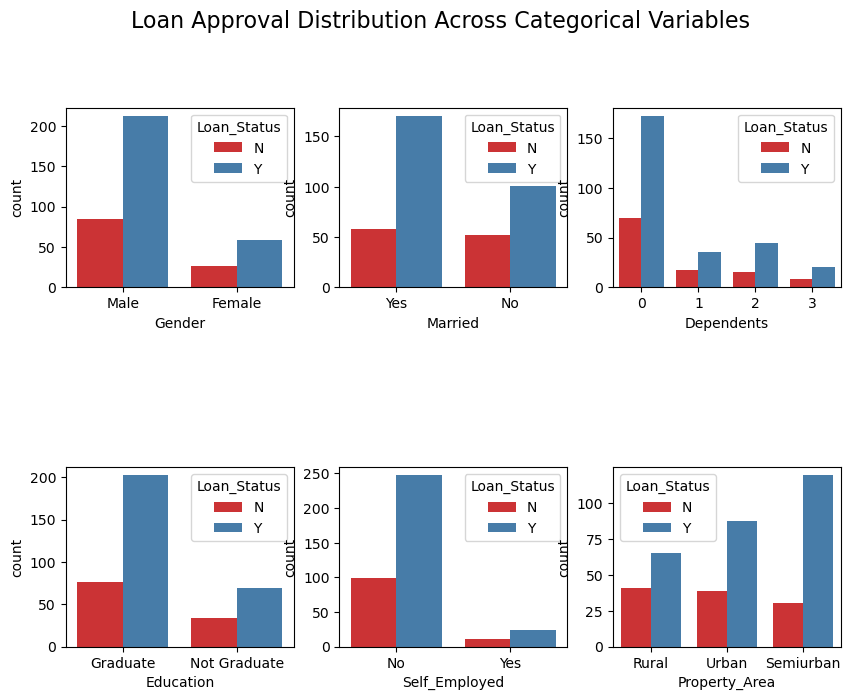

In [9]:
categorical_columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
fig, ax = plt.subplots(2, 3, figsize=(10,7))

for index, cat_col in enumerate(categorical_columns):
    row, col = index//3, index%3
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=ax[row, col], palette='Set1')

plt.suptitle('Loan Approval Distribution Across Categorical Variables', fontsize=16, y=1.02)
plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       381.000000         381.000000  381.000000        381.000000
mean       3579.845144        1277.272966  104.986877        341.417323
std        1419.813818        2340.818546   28.358464         67.625957
min         150.000000           0.000000    9.000000         12.000000
25%        2600.000000           0.000000   90.000000        360.000000
50%        3333.000000         983.000000  110.000000        360.000000
75%        4288.000000        2016.000000  127.000000        360.000000
max        9703.000000       33837.000000  150.000000        480.000000


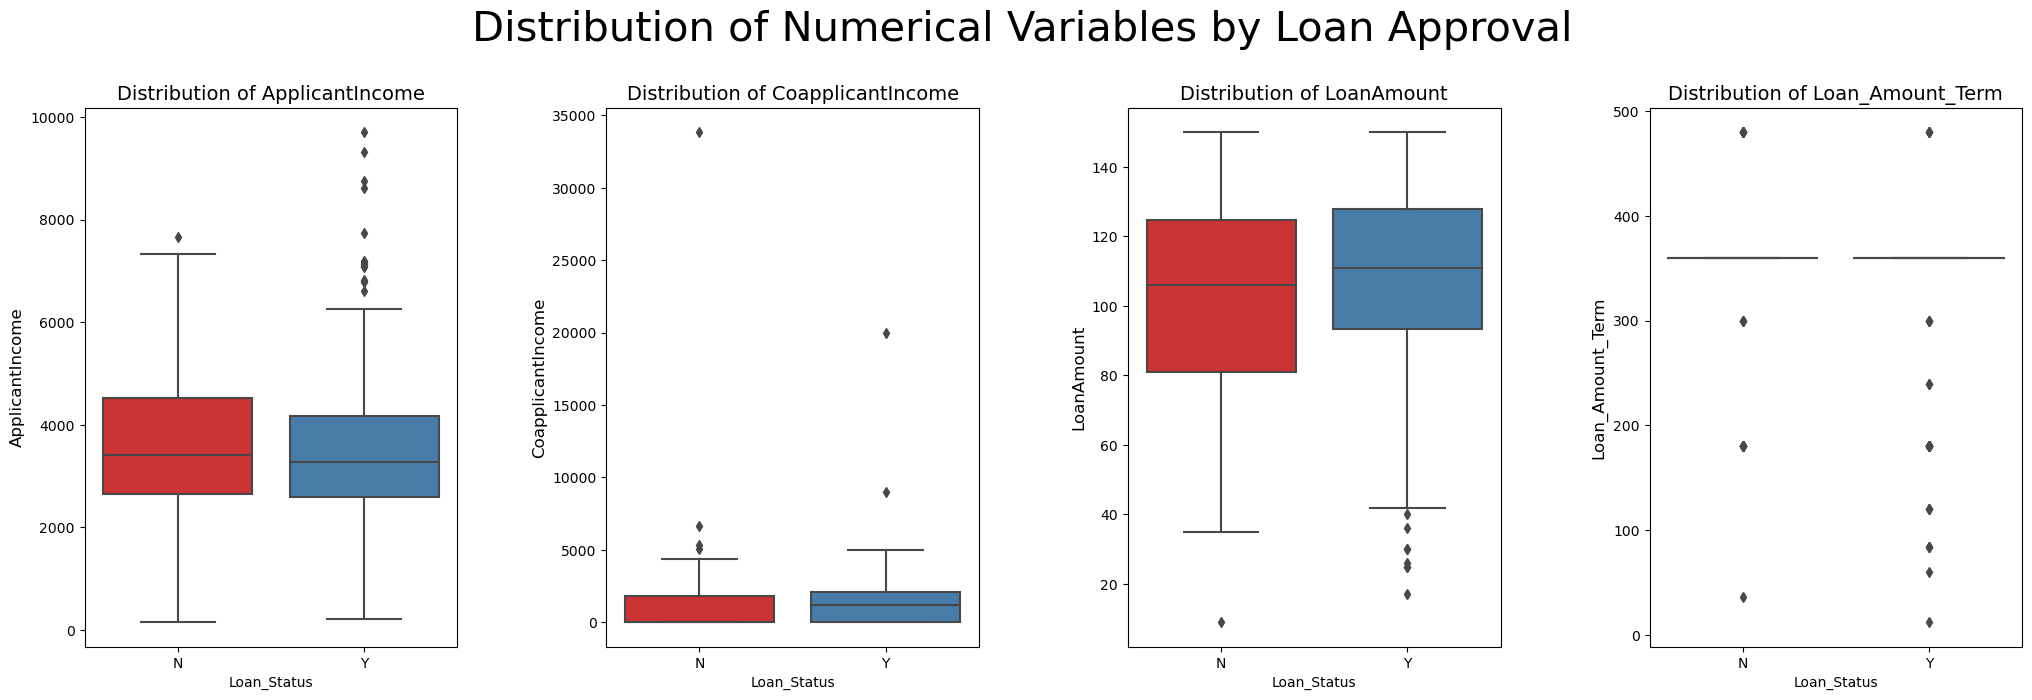

In [10]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

fig, axes = plt.subplots(1, 4, figsize=(25, 7))
for idx, num_col in enumerate(numerical_columns):
    sns.boxplot(x='Loan_Status', y=num_col, data=df, ax=axes[idx], palette='Set1')
    axes[idx].set_title(f'Distribution of {num_col}', fontsize=14)
    axes[idx].set_ylabel(num_col, fontsize=12)
plt.suptitle('Distribution of Numerical Variables by Loan Approval', fontsize=30, y=1.02)
plt.subplots_adjust(wspace=0.4)
print(df[numerical_columns].describe())

plt.show()

# Converting categorical data into numerical form

In [11]:
convert_columns = ['Gender', 'Married', 'Education','Self_Employed', 'Loan_Status']
for col in convert_columns:
    uniques_value = df[col].unique()
    df[col].replace(uniques_value, [0, 1], inplace=True)
df['Property_Area'].replace(df['Property_Area'].unique(), [0, 1, 3], inplace=True)

In [12]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))


Unique values in column Gender are: [0 1]
Unique values in column Married are: [0 1]
Unique values in column Dependents are: [1 0 2 3]
Unique values in column Education are: [0 1]
Unique values in column Self_Employed are: [0 1]
Unique values in column ApplicantIncome are: [4583 3000 2583 6000 2333 3200 2500 1853 1299 4950 3596 3510 4887 2600
 7660 3365 2799 4226 1442 3750 3167 4692 3500 1828 3667 3748 3600 1800
 2400 3941 4695 3410 5649 5821 2645 4000 1928 3086 4230 4616 2708 2132
 3366 3357 3029 4166 7100 4300 1875 4755 1000 3333 3846 3988 2366 2958
 3273 4133 3620 2484 1977 4188 1759 4288 3052 7333 2071 5316 2929 5050
 2214 2137 2957 3692 2014 2718 3459 4895 3316 4200 2698 2330 1538 4860
 6277 2281 3254 2980 1863 3089 9323 2439 2237 1820 3522 4344 3497 2045
 1916 4600 3625 2178 2383 4885 3858 4191 1907 3416 3917 4408 3244 3975
 2479 3418 3430 5703 3173 3850  150 3727 5000 4283 2221 4009 2971 6250
 4735 2491 3716 3189 3155 3463 3812 3315 5819 2510 3406 6050 9703 6608
 2882 1809 3427 

<Axes: >

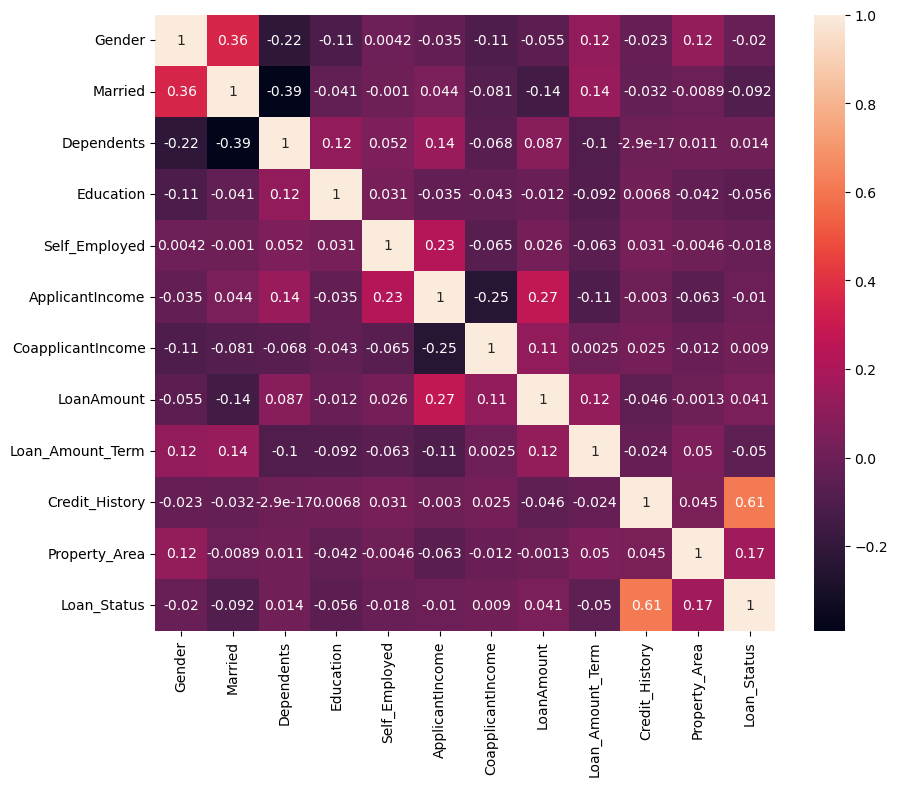

In [13]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

#    Preprocessing Data

In [14]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((381, 11), (381,), (304, 11), (304,), (77, 11), (77,))

In [17]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [18]:
X_train

array([[ 1.89896303,  1.23827837, -0.67683674, ...,  0.26257097,
         0.44367825,  1.18650879],
       [-0.52660319, -0.80757285, -0.67683674, ...,  0.26257097,
         0.44367825,  1.18650879],
       [-0.52660319,  1.23827837, -0.67683674, ...,  0.26257097,
        -2.25388553, -1.18131619],
       ...,
       [-0.52660319, -0.80757285, -0.67683674, ...,  0.26257097,
         0.44367825, -1.18131619],
       [-0.52660319, -0.80757285, -0.67683674, ...,  0.26257097,
         0.44367825, -1.18131619],
       [-0.52660319,  1.23827837, -0.67683674, ...,  2.07669764,
        -2.25388553,  1.18650879]])

# Model Selection

## DecisionTreeClassifier

In [19]:
start = time.time()
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_score_dt = roc_auc_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)
precision_score_dt = precision_score(y_test, y_pred_dt)
recall_score_dt = recall_score(y_test, y_pred_dt)
print(f'Accuracy Score: {accuracy_dt:0.2f}')
print(f'F1 Score: {f1_score_dt:0.2f}')
print(f'Precision Score: {precision_score_dt:0.2f}')
print(f'Recall Score: {recall_score_dt:0.2f}')
print('Elapsed Time:',time.time()-start)

Accuracy Score: 0.75
F1 Score: 0.83
Precision Score: 0.82
Recall Score: 0.84
Elapsed Time: 0.00967717170715332


## LogisticRegression

In [20]:
start = time.time()
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_score_lr = roc_auc_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
precision_score_lr = precision_score(y_test, y_pred_lr)
recall_score_lr = recall_score(y_test, y_pred_lr)
print(f'Accuracy Score: {accuracy_lr:0.2f}')
print(f'F1 Score: {f1_score_lr:0.2f}')
print(f'Precision Score: {precision_score_lr:0.2f}')
print(f'Recall Score: {recall_score_lr:0.2f}')
print('Elapsed Time:',time.time()-start)

Accuracy Score: 0.82
F1 Score: 0.89
Precision Score: 0.80
Recall Score: 1.00
Elapsed Time: 0.015057563781738281


## RandomForestClassifier

In [21]:
start = time.time()
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_score_rf = roc_auc_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
precision_score_rf = precision_score(y_test, y_pred_rf)
recall_score_rf = recall_score(y_test, y_pred_rf)
print(f'Accuracy Score: {accuracy_rf:0.2f}')
print(f'F1 Score: {f1_score_rf:0.2f}')
print(f'Precision Score: {precision_score_rf:0.2f}')
print(f'Recall Score: {recall_score_rf:0.2f}')
print('Elapsed Time:',time.time()-start)

Accuracy Score: 0.81
F1 Score: 0.88
Precision Score: 0.80
Recall Score: 0.98
Elapsed Time: 0.1950385570526123


# Hyperparameter Tuning

## DecisionTreeClassifier

In [22]:
start = time.time()
# setup parameter space
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# create an instance of the grid search object
gs_dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# conduct grid search over the parameter space
gs_dt.fit(X_train,y_train)

# show best parameter configuration found for classifier
params_dt = gs_dt.best_params_
print('The best parameters : ',params_dt)

# compute performance on test set
model = gs_dt.best_estimator_
y_pred = model.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred))
print('precision score: %.2f' % precision_score(y_test,y_pred))
print('recall score: %.2f' % recall_score(y_test,y_pred))
print('f1 score: %.2f' % f1_score(y_test,y_pred))
print('Elapsed Time:',time.time()-start)

The best parameters :  {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 3, 'min_samples_split': 2}
accuracy score: 0.82
precision score: 0.80
recall score: 1.00
f1 score: 0.89
Elapsed Time: 15.033975839614868


## LogisticRegression

In [23]:
start = time.time()
parameters = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [10,100,1000,2500, 5000]
    }
]

gs_lr = GridSearchCV(LogisticRegression(), parameters, cv = 5, n_jobs=-1)

gs_lr.fit(X_train,y_train)

params_lr = gs_lr.best_params_
print('The best parameters : ',params_lr)

model_lr = gs_lr.best_estimator_
y_pred_lr = model_lr.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred_lr))
print('precision score: %.2f' % precision_score(y_test,y_pred_lr))
print('recall score: %.2f' % recall_score(y_test,y_pred_lr))
print('f1 score: %.2f' % f1_score(y_test,y_pred_lr))
print('Elapsed Time:',time.time()-start)

The best parameters :  {'C': 0.03359818286283781, 'max_iter': 10, 'penalty': 'l2', 'solver': 'sag'}
accuracy score: 0.82
precision score: 0.80
recall score: 1.00
f1 score: 0.89
Elapsed Time: 8.732242345809937


## RandomForestClassifier

In [24]:
start = time.time()
parameters_rf = {'n_estimators': [5,20,50,100],
'max_features': ['auto', 'sqrt'],
'max_depth': [10,20,30],
'min_samples_split': [2, 6, 10],
'min_samples_leaf': [1, 3, 4],
'bootstrap': [True, False]}

gs_rf = GridSearchCV(RandomForestClassifier(), parameters_rf, cv = 5, n_jobs=-1)

gs_rf.fit(X_train,y_train)

params_rf = gs_rf.best_params_
print('The best parameters : ',params_rf)

model_rf = gs_rf.best_estimator_
y_pred_rf = model_rf.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred_rf))
print('precision score: %.2f' % precision_score(y_test,y_pred_rf))
print('recall score: %.2f' % recall_score(y_test,y_pred_rf))
print('f1 score: %.2f' % f1_score(y_test,y_pred_rf))
print('Elapsed Time:',time.time()-start)

The best parameters :  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}
accuracy score: 0.82
precision score: 0.80
recall score: 1.00
f1 score: 0.89
Elapsed Time: 53.64322257041931


The LogisticRegression seems to be best model for this dataset which run in shorter elapsed time. And the best parameters are {'C': 0.03359818286283781, 'max_iter': 10, 'penalty': 'l2', 'solver': 'sag'}